In [4]:
%matplotlib widget
import pyvisa
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.optimize import curve_fit


import sys 
sys.path.insert(0, r'C:\Users\oper\SynologyDrive\Lab2023\Qubit\QTLab2324\PAandQubit\Actual_Work')
sys.path.insert(1, r'C:\Users\oper\SynologyDrive\Lab2023\Qubit\QTLab2324\PAandQubit\Instruments\network\RS_Signal_Generator')

sys.path.insert(2, r'C:\Users\oper\SynologyDrive\Lab2023\Qubit\QTLab2324\PAandQubit\Instruments\QuickSyn')
sys.path.insert(3, r'C:\Users\oper\SynologyDrive\Lab2023\Qubit\QTLab2324\PAandQubit\Instruments\Acquisition_Card')
sys.path.insert(4, r'C:\Users\oper\SynologyDrive\Lab2023\Qubit\QTLab2324\PAandQubit\Instruments\network\AWG')

import FunFit as FF
import Tuls as Ts


import RS_SMA100B
from AWG_KS_33500B import KS_33500B
import FSL_0010
from Card_Class import PXIe5170R

QSyn_port       = 'COM36'
SG_ip           = '192.168.40.15'                                  
Card_Name       = 'PXI1Slot3'

fsl             = FSL_0010.FSL10_synthesizer(device_address = QSyn_port)
sGen            = RS_SMA100B.SMA100B(ip = SG_ip)
augh            = KS_33500B()
pxie            = PXIe5170R(resource_name = Card_Name)


FSL_0010:	Connection successful!
SMA100B:	Connection successful!
AWG_KS33500B:	Connection successful!
PXIe_5170R:	Connection successful!


In [35]:
frequency = 5e9
pulse_width = 4e-6
awg_freq = 1e3
sGen.RF_freq(frequency)
fsl.set_frequency(frequency)

fsl.set_output('ON')



feis = 360 * pulse_width * awg_freq
phase = -1.8                        # in gradiants
augh.set_phase()

[-0.00121404 -0.00125528 -0.00126925 ... -0.00128594 -0.00122393
 -0.0012287 ]


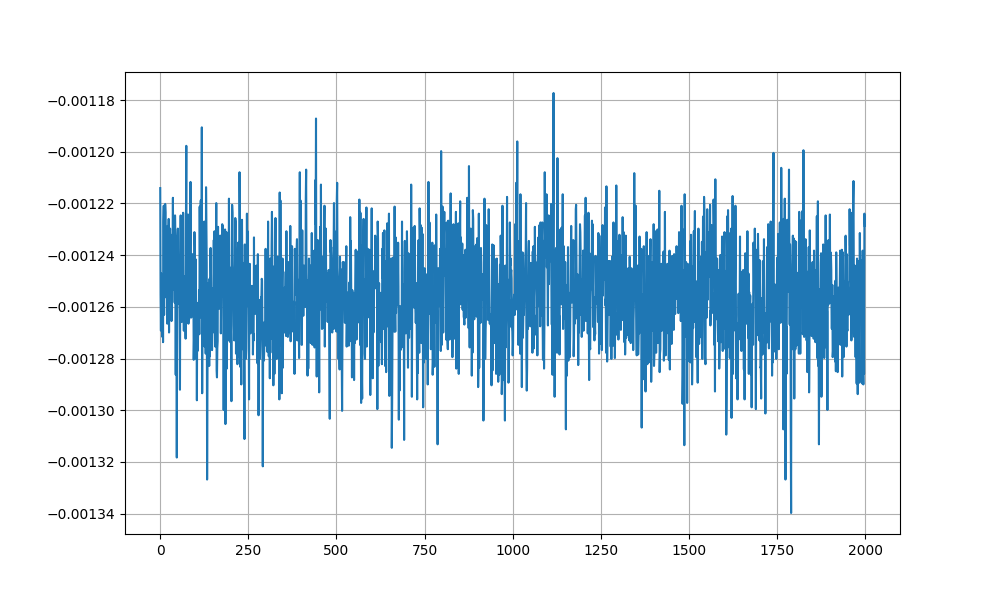

In [44]:
pxie.num_pts            = 2000
pxie.sample_rate        = 250e6 
pxie.num_records        = 1024

pxie.open()
waveforms = pxie.acquisition()
# ch1 = np.array([np.array(wfm.samples.tolist()) for wfm in waveforms if wfm.channel == '1'])
ch1_awg = np.mean(waveforms['CH1'], axis=0)
print(ch1_awg)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(ch1_awg)
plt.show()

## Cosa abbiamo fatto:
Lo scopo di oggi 26/06/2024 è stato quello di trovare il delay relativo per l'impulso di drive e di read out e anche l'offset di dell' awg.

## Parametri strumenti
Da canale 1 di Awg mandiamo 800 mVpp, offset di 400 mV, fase 33° e larghezza di 4 micros. Suo segnale e trigger sono a 2 kHz. Il Trigger (Nel canale 2) è a 1 Vpp e la sua larghezza è di 200 microsecondi.

Sfasamento tra awg e Sig_Gen = -1.8°

impostazione trigger del sig gen: trigger Mode = Ext Single

Che cazzo è precisamente sto offset?